## Dimensionality Reduction

Sometimes we may have dataset, that includes millons features that causing making so slow and bad training. 

This problem is often referred to as the **curse of dimensionality.**



For example, consider the MNIST images the pixels on the image borders are almost always white, so you could completely drop these pixels from the training set without losing much information. 

Additionally, two neighboring pixels are often highly correlated: if you merge them into a single pixel (e.g., by taking the mean of the two pixel intensities), you will not lose much information.

---
**WARNİNG**

Reducing dimensionality does cause some information loss (just like compressing an image to JPEG can degrade its quality), so even though it will speed up training, it may make your system perform slightly worse.


---

Apart from speeding up training, dimensionality reduction is also extremely useful for data visualization (or DataViz). Reducing the number of dimensions down to two (or three) makes it possible to plot a condensed view of a high-dimensional training set on a graph and often gain some important insights by visually detecting patterns, such as clusters. Moreover, DataViz is essential to communicate your conclusions to people who are not data scientists—in particular, decision makers who will use your results.

----

In theory, one solution to the curse of dimensionality could be to increase the size of the training set to reach a sufficient density of training instances. Unfortunately, in practice, the number of training instances required to reach a given density grows exponentially with the number of dimensions. With just 100 features (significantly fewer than in the MNIST problem), you would need more training instances than atoms in the observable universe in order for training instances to be within 0.1 of each other on average, assuming they were spread out uniformly across all dimensions.

---

### Main Approaches for Dimensionality Reduction


Before we dive into specific dimensionality reduction algorithms, let’s take a look at the two main approaches to reducing dimensionality: **projection** and **Manifold Learning**.

#### Projection

In most real-world problems, training instances are not spread out uniformly across all dimensions. Many features are almost constant, while others are highly correlated (as discussed earlier for MNIST). As a result, all training instances lie within (or close to) a much lower-dimensional subspace of the high-dimensional space

->There is visualisations in book about Projection.

---

#### Manifold Learning
Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie; this is called Manifold Learning. It relies on the manifold assumption, also called the manifold hypothesis, which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold. This assumption is very often empirically observed.

--> Sometimes reducing dimensions, is create simpler dataset but sometimes its end up more complex datasets. Its all depends on the dataset.

---

## PCA | Principal Component Analysis 
Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it, just like in Figure 8-2.

PCA select axis that preserves the maximum amount of variance. As it will most likely loss less information then the other prohections. 

### Principal Components

Useful content for that: https://www.youtube.com/watch?v=FgakZw6K1QQ&ab_channel=StatQuestwithJoshStarmer

### Projecting Down to d Dimensions

Once you have identified all the principal components, you can reduce the dimensionality of the dataset down to d dimensions by projecting it onto the hyperplane defined by the first d principal components. Selecting this hyperplane ensures that the projection will preserve as much variance as possible. For example, in Figure 8-2 the 3D dataset is projected down to the 2D plane defined by the first two principal components, preserving a large part of the dataset’s variance. As a result, the 2D projection looks very much like the original 3D dataset.

---

### Using Scikit-Learn

In [12]:
from sklearn.model_selection import train_test_split
import pandas as pd 
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df["Outcome"]=df.Outcome.astype("category")
y=df[["Outcome"]]
X=df.drop(columns='Outcome')
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test,=train_test_split(X,y, test_size=0.30, random_state=42);

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
X2D = pca.fit_transform(X_train)

In [27]:
X2D[:3]

array([[-24.59148559,  26.12111862,   8.48453236,   0.25385594,
         -6.95015936],
       [242.43838617,  39.72311789,  -3.71787368,  -8.71834871,
         -2.51234623],
       [171.78001931,   5.52263343,  -0.87079053,  15.54540215,
         -3.21759389]])

**Explained Variance Ratio**

In [34]:
pca.explained_variance_ratio_

array([0.89108035, 0.06306766, 0.02246461, 0.0129701 , 0.00708017])

---
### Choosing the Right Number of Dimensions

Instead of arbitrarily choosing the number of dimensions to reduce down to, it is simpler to choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%). Unless, of course, you are reducing dimensionality for data visualization—in that case you will want to reduce the dimensionality down to 2 or 3.

In [36]:
import numpy as np 
# cumsum: Returns the cumulative sum of the elements along a given axis.
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.89108035, 0.95414801, 0.97661262, 0.98958272, 0.99666289])

In [47]:
d = np.argmax(cumsum >= 0.95) + 1

In [48]:
d

2

Yet another option is to plot the explained variance as a function of the number of dimensions (simply plot cumsum; see Figure 8-8). There will usually be an elbow in the curve, where the explained variance stops growing fast. In this case(plotted in the book), you can see that reducing the dimensionality down to about 100 dimensions wouldn’t lose too much explained variance.

plot: 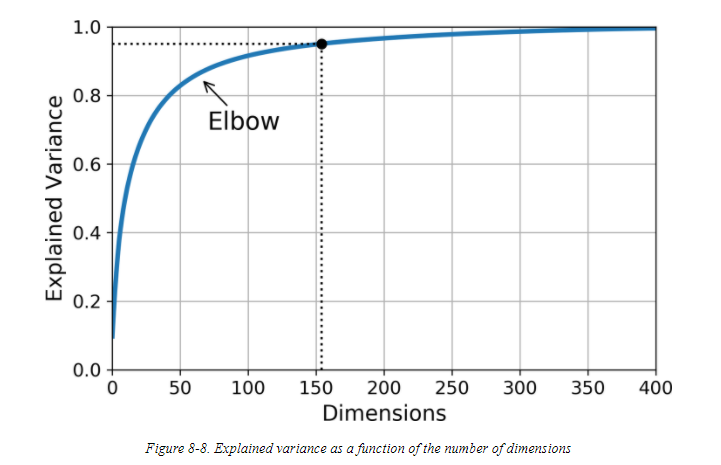

### PCA for Compression

After dimensionality reduction, the training set takes up much less space. As an example, try applying PCA to the MNIST dataset while preserving 95% of its variance. You should find that each instance will have just over 150 features, instead of the original 784 features. So, while most of the variance is preserved, the dataset is now less than 20% of its original size! This is a reasonable compression ratio, and you can see how this size reduction can speed up a classification algorithm (such as an SVM classifier) tremendously.

It is also possible to decompress the reduced dataset back to 784 dimensions by applying the inverse transformation of the PCA projection. This won’t give you back the original data, since the projection lost a bit of information (within the 5% variance that was dropped), but it will likely be close to the original data. The mean squared distance between the original data and the reconstructed data (compressed and then decompressed) is called the reconstruction error.

The following code compresses the MNIST dataset down to 154 dimensions, then uses the inverse_transform() method to decompress it back to 784 dimensions:

In [50]:
pca = PCA(n_components = 4)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

Here the original dataset and comperisson and de comperisson dataset.
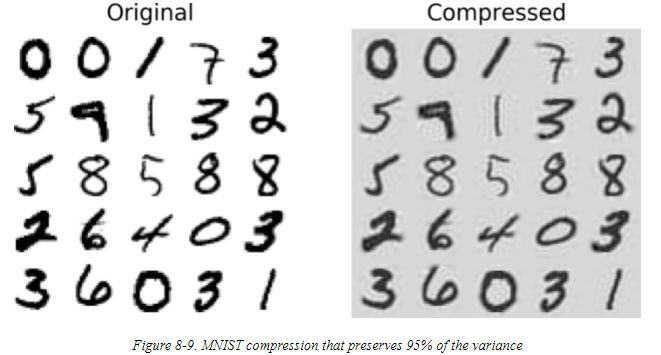

**Randomized PCA**

If you set the svd_solver hyperparameter to "randomized", Scikit-Learn uses a stochastic algorithm called Randomized PCA that quickly finds an approximation of the first d principal components. Its computational complexity is O(m × d2) + O(d3), instead of O(m × n2) + O(n3) for the full SVD approach, so it is dramatically faster than full SVD when d is much smaller than n:

In [55]:
rnd_pca = PCA(n_components=3, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

By default, svd_solver is actually set to "auto": Scikit-Learn automatically uses the randomized PCA algorithm if m or n is greater than 500 and d is less than 80% of m or n, or else it uses the full SVD approach. If you want to force Scikit-Learn to use full SVD, you can set the svd_solver hyperparameter to "full".

**Incremental PCA**

One problem with the preceding implementations of PCA is that they require the whole training set to fit in memory in order for the algorithm to run. Fortunately, Incremental PCA (IPCA) algorithms have been developed. They allow you to split the training set into mini-batches and feed an IPCA algorithm one mini-batch at a time. This is useful for large training sets and for applying PCA online (i.e., on the fly, as new instances arrive).

The following code splits the MNIST dataset into 100 mini-batches (using NumPy’s array_split() function) and feeds them to Scikit-Learn’s IncrementalPCA class5 to reduce the dimensionality of the MNIST dataset down to 154 dimensions (just like before). Note that you must call the partial_fit() method with each mini-batch, rather than the fit() method with the whole training set:

In [67]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100 #datayı 100 parcaya ayir.
inc_pca = IncrementalPCA(n_components=3)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch) #her bir parcaya parca parca PCA uygula. 
                                # boylece memory icin daya utgun bir yapi elde edilebilir.
X_reduced = inc_pca.transform(X_train)

In [58]:
X_reduced

array([[-24.59164127, -26.11055532,  -8.35551075],
       [242.43739179, -39.68885437,   4.37830384],
       [171.78214445,  -5.59890316,  -0.25295746],
       ...,
       [-80.07869242,  -9.33281982,  25.29213143],
       [-78.91766628,  18.63057694, -72.31850849],
       [-79.84683875,  15.07149489,  17.04030383]])

In [61]:
pca=PCA(n_components=3)
X_reduced=pca.fit_transform(X_train)
X_reduced

array([[-24.59148559,  26.12111862,   8.48453236],
       [242.43838617,  39.72311789,  -3.71787368],
       [171.78001931,   5.52263343,  -0.87079053],
       ...,
       [-80.08075617,   9.23508322, -26.57515149],
       [-78.91746821, -18.59232101,  71.54642854],
       [-79.84623419, -15.01907933, -15.3681616 ]])

### Kernel PCA

It turns out that the same trick can be applied to PCA, making it possible to perform complex nonlinear projections for dimensionality reduction. This is called Kernel PCA (kPCA).6 It is often good at preserving clusters of instances after projection, or sometimes even unrolling datasets that lie close to a twisted manifold.

The following code uses Scikit-Learn’s KernelPCA class to perform kPCA with an RBF kernel (see Chapter 5 for more details about the RBF kernel and other kernels):

In [99]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.1)
X_reduced = rbf_pca.fit_transform(X_train)
X_reduced[:3]

array([[-0.00310213, -0.00294741],
       [-0.00310123, -0.00294605],
       [-0.00310123, -0.00294605]])

In [100]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="linear", gamma==0.1)
X_reduced = rbf_pca.fit_transform(X_train)
X_reduced[:3]

array([[-24.59148559,  26.12111862],
       [242.43838617,  39.72311789],
       [171.78001931,   5.52263343]])

In [101]:
pca=PCA(n_components = 2)
X_reduced = pca.fit_transform(X_train)
X_reduced

array([[-24.59148559,  26.12111862],
       [242.43838617,  39.72311789],
       [171.78001931,   5.52263343],
       ...,
       [-80.08075617,   9.23508322],
       [-78.91746821, -18.59232101],
       [-79.84623419, -15.01907933]])

### Selecting a Kernel and Tuning Hyperparameters

bunu gridSearch kullanarak yapacağız. PCA, bir hazırlık adımı olduğundan, önce boyut indirgeyip sonra tahmin üreteceğimiz bir pipeline olusturalım: 

In [117]:
import warnings
warnings.filterwarnings("ignore")

In [134]:
KernelPCA().degree

3

In [131]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"],
        "log_reg__penalty": ["l2"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                                 

In [122]:
grid_search.best_params_

{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}

Ya da ( başka bir yöntem ve bence gerek yok, ama emin değilim bundan) indirgenen train setini inverse edince ortaya çıkandan C_inverse ü orjinal X_train den çıkartınca elde edilen mean squared erroru en az yapan hiperparametreler seçilebilir.

In [151]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X_train)
X_pre = rbf_pca.inverse_transform(X_reduced)

In [152]:
X_reduced[0:2]

array([[-0.00370787, -0.00295104],
       [-0.00355124, -0.00279963]])

In [148]:
X_pre[:2]

array([[  3.72047136, 120.681588  ,  69.65459327,  20.42214757,
         79.79164896,  31.92972915,   0.46925886,  33.02689313],
       [  3.72046196, 120.68066167,  69.65158095,  20.42130868,
         79.78867075,  31.92952639,   0.46925485,  33.02668898]])

In [154]:
X_train[:2]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
